In [1]:
import pandas as pd
import numpy as np

import gensim


from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import StratifiedKFold


from matplotlib import pyplot as plt
import seaborn as sns



pd.options.mode.chained_assignment = None  

In [2]:
df = pd.read_csv('tag_pre.csv')

In [3]:
corpus = df['Tags'].apply(lambda x: x.split())
corpus

0        [celebr, parti, board, young, famili, sumer, o...
1        [cute, portrait, beauti, lok, young, beauti, l...
2        [swet, flower, cute, ador, life, portrait, bea...
3        [celebr, drink, parti, board, young, famili, s...
4        [close, -, up, portrait, love, two, monochrom,...
                               ...                        
16300    [top, portrait, beauti, beauti, canon, light, ...
16301    [portrait, beauti, beauti, bodi, gorgeous, mod...
16302    [autumn, portrait, beauti, beauti, light, emot...
16303    [autumn, portrait, beauti, beauti, light, emot...
16304    [portrait, young, sumer, winter, spring, light...
Name: Tags, Length: 16305, dtype: object

# Create Word Embeddings for Tags using Word2Vec

In [4]:

model_w2v = gensim.models.Word2Vec( corpus, size=100, window=20, min_count=1,sg = 0, seed = 34)

model_w2v.train(corpus, total_examples= len(df['Tags']), epochs=100)

(22531524, 32006700)

In [5]:
#model_w2v.save("word2vec.model")

C:\Users\FTM\AppData\Local\Temp/ipykernel_6740/2856825331.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model_w2v[model_w2v.wv.vocab]


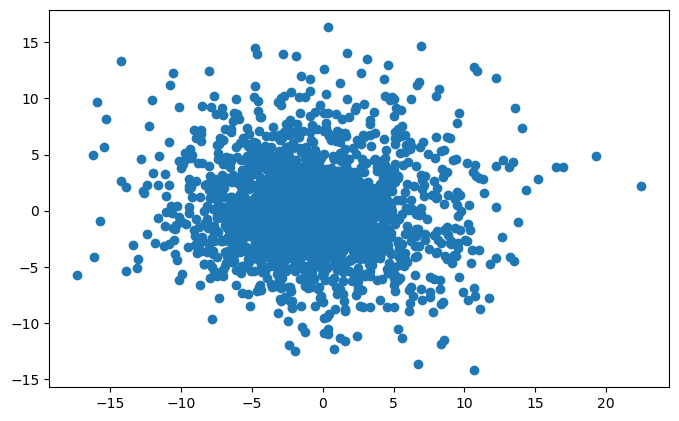

In [6]:
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA


X = model_w2v[model_w2v.wv.vocab]
pca = PCA(n_components=2)

result = pca.fit_transform(X)

plt.figure(figsize=(8,5),dpi=100)

plt.scatter(result[:, 0], result[:, 1],)
plt.show()

In [7]:
vectorizedTags = [None]*len(df)
for i in range(len(df)):
    tag=[]
    words = df['Tags'][i].split()
    for word in words:
        try:
            tag.append(model_w2v.wv[word])
        except:
            'do nothing'
    title_avg = np.mean(np.array(tag, dtype='f'),axis=0)
    vectorizedTags[i]=title_avg
    
    
d = pd.DataFrame(vectorizedTags)
d

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.444793,-0.381168,-1.169136,0.738788,-1.248358,-0.375668,0.951666,0.165402,1.224858,0.281946,...,0.987161,-0.476327,1.433943,0.005788,0.754384,-0.096581,-0.411955,0.238074,-0.446065,0.752269
1,0.238944,-0.246932,-0.193775,0.630763,0.079014,1.423093,0.879514,0.152608,-0.125863,-0.597040,...,0.900927,0.222877,0.468977,0.228250,0.470747,1.788484,0.096092,0.553405,-1.030034,0.002713
2,-0.647869,-1.019981,-1.949137,0.129168,-1.460489,0.056828,1.516034,-0.203074,1.119530,-0.766980,...,1.757391,0.776762,1.919918,0.442165,0.413202,1.405554,-0.619393,0.003385,-0.059466,1.265759
3,0.364226,-0.462931,-1.125611,0.712097,-1.266656,-0.443705,1.047992,0.245887,1.280315,0.307859,...,1.089580,-0.402224,1.431103,0.034130,0.986647,-0.260159,-0.267183,0.230341,-0.307157,0.724400
4,0.150836,0.795066,-0.150633,0.611872,0.036914,0.313008,0.663657,-0.088952,-0.563514,-0.621220,...,1.121634,0.858393,-0.144870,-0.060121,0.041016,-0.202227,-0.167383,0.924171,0.158893,0.706364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16300,0.081961,-0.062927,-0.032971,0.291617,0.085335,0.429392,0.294220,0.606311,-0.845049,-0.265012,...,1.243990,-1.363319,-1.143432,-0.956463,0.035425,0.944313,-0.321734,-0.247963,-0.982154,0.322965
16301,-0.599907,0.064624,-0.473140,-0.835375,-0.655143,1.006833,0.831340,0.675780,-1.081193,-0.102938,...,0.993352,-1.285863,-0.263216,-1.084328,0.051515,0.751303,-0.842901,0.300132,-0.147174,-0.770409
16302,-0.620176,-0.313328,0.352230,0.570223,-0.193342,0.987064,0.926253,0.930023,-0.649200,-0.612703,...,0.823698,-0.885178,0.029742,-1.094207,0.184042,0.857166,-0.610703,-0.319474,-0.552636,-0.905089
16303,-0.620176,-0.313328,0.352230,0.570223,-0.193342,0.987064,0.926253,0.930023,-0.649200,-0.612703,...,0.823698,-0.885178,0.029742,-1.094207,0.184042,0.857166,-0.610703,-0.319474,-0.552636,-0.905089


In [8]:
df = pd.merge( left=df, right=d, left_index=True, right_index=True)

# Classificatin

In [9]:
def random_forest():
    return RandomForestClassifier(n_estimators=1000)

def gb_tree():
    return GradientBoostingClassifier(n_estimators=100,max_depth=8,subsample=0.7,min_samples_leaf=4)

def adaboost_tree():
    return AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100),n_estimators=20) # removed learning rate = 0.5
    
def adaboost_logistic():
    return AdaBoostClassifier(base_estimator=LogisticRegression(solver='lbfgs',class_weight="balanced",penalty="l2",multi_class="auto",n_jobs=-1,max_iter=500),
                              n_estimators=10,learning_rate=0.5)

def logistic():
    return make_pipeline(StandardScaler(),LogisticRegression(solver='saga',class_weight="balanced",penalty="l1",multi_class="auto",n_jobs=-1))

def ridge():
    return RidgeClassifier(alpha=0.3,normalize=True,class_weight="balanced")

def svm():
    return make_pipeline(StandardScaler(),SVC(class_weight="balanced",gamma='scale',C=1000.0,kernel="rbf",max_iter=100000,probability=True))

def voter():
    return VotingClassifier(estimators=[("svm",svm()),("rf",random_forest()),("adaboost",adaboost_tree())],
                            voting="soft")

def extra_trees():
    return ExtraTreesClassifier(bootstrap=False, criterion="gini", max_features=0.35000000000000003, min_samples_leaf=11, min_samples_split=15, n_estimators=100)




def select_Algorithm(algorithm):
    if algorithm=="RF":
        model_builder = random_forest
    elif algorithm=="GBTREE":
        model_builder = gb_tree
    elif algorithm=="ADABOOST":
        model_builder = adaboost_tree
    elif algorithm=="ADABOOST_LOGISTIC":
        model_builder = adaboost_logistic
    elif algorithm=="LOGISTIC":
        model_builder = logistic
    elif algorithm=="RIDGE":
        model_builder = ridge
    elif algorithm=="SVM":
        model_builder = svm
    elif algorithm=="VOTER":
        model_builder = voter
    elif algorithm=="EXTRA_TREES":
        model_builder = extra_trees
        
    return model_builder

In [10]:
def train_test_get_metrics(model_builder,X_train, X_test, y_train, y_test):
    model = model_builder()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclassification = 1 - accuracy
    precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred)
    precision_final, recall_final, fscore_final, _ = precision_recall_fscore_support(y_test, y_pred,average='macro')
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    return cm,accuracy,balanced_accuracy,misclassification,precision,recall,fscore,support,precision_final, recall_final, fscore_final

### K-Fold

In [21]:
model_builder = select_Algorithm ("SVM")

In [31]:
X =df[df.columns[7:]]
y = df[df.columns[6]]

skf = StratifiedKFold(n_splits=10)
cv_results = []
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    r = train_test_get_metrics(model_builder,X_train, X_test, y_train, y_test)
    cv_results.append(r)

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
def summarise_cv_results(cv_results):
    cm, accuracy, balanced_accuracy, misclassification, precision, recall, fscore,support, precision_final, recall_final, fscore_final = list(),list(),list(),list(),list(),list(),list(),list(),list(),list(),list()
    for r in cv_results:
        cm.append(r[0])
        accuracy.append(r[1])
        balanced_accuracy.append(r[2])
        misclassification.append(r[3])
        precision.append(r[4])
        recall.append(r[5])
        fscore.append(r[6])
        support.append(r[7])
        precision_final.append(r[8])
        recall_final.append(r[9])
        fscore_final.append(r[10])


    accuracy = np.mean(accuracy)
    balanced_accuracy = np.mean(balanced_accuracy)
    misclassification = np.mean(misclassification)

    precision_final = np.mean(precision_final)
    recall_final = np.mean(recall_final)
    fscore_final = np.mean(fscore_final)

    precision = np.mean(precision,axis=0)
    recall = np.mean(recall,axis=0)
    fscore = np.mean(fscore,axis=0)
    support = np.mean(support,axis=0).astype(int)
    cm = np.sum(cm,axis=0).astype(int)

    return cm, accuracy, balanced_accuracy, misclassification, precision, recall, fscore, support, precision_final, recall_final, fscore_final

cm, accuracy, balanced_accuracy, misclassification, precision, recall, fscore, support, precision_final, recall_final, fscore_final = summarise_cv_results([r])


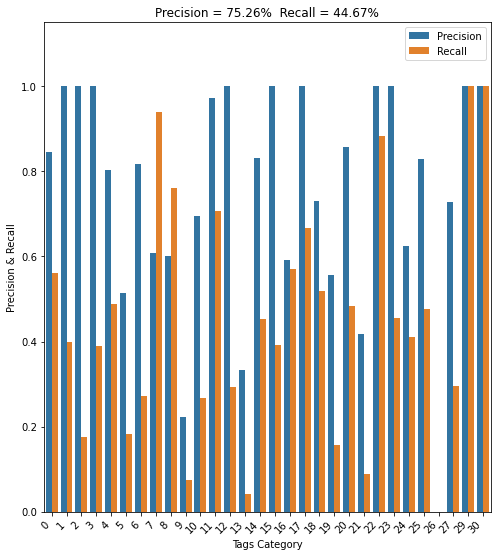

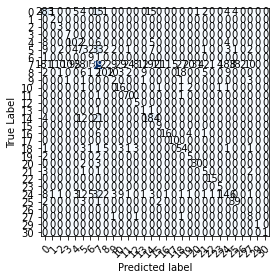

In [40]:
precision_recall_single_plot = True

d1 = pd.DataFrame({"Tags Category":list(set(df['Category'])),"value":precision,"Metric":["Precision"]*len(list(set(df['Category'])))})
d2 = pd.DataFrame({"Tags Category":list(set(df['Category'])), "value": recall, "Metric": ["Recall"] * len(list(set(df['Category'])))})
df_p_r = pd.concat((d1,d2),ignore_index=True)
f, (ax1) = plt.subplots(1, 1, figsize=(8, 9))
sns.barplot(x="Tags Category",y="value",hue="Metric",data=df_p_r,ax=ax1)
plt.ylim((0,1.15))
plt.legend(loc='upper right')
ax1.set_title("Precision = %2.2f%%  Recall = %.2f%%"%(precision_final*100,recall_final*100))
ax1.set_xlabel("Tags Category")
ax1.set_ylabel("Precision & Recall")
plt.xticks(rotation=45, ha="right")
plt.show()

cmap = plt.get_cmap('Blues')

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
im = ax.imshow(cm, cmap=cmap)

ax.set_xticks(np.arange(len(cm[0])))
ax.set_yticks(np.arange(len(cm[1])))

# Label each axis tick
ax.set_xticklabels(list(set(df['Category'])))
ax.set_yticklabels(list(set(df['Category'])))

# Label each axis
ax.set_ylabel("True Label")
ax.set_xlabel("Predicted label")
# uncomment this line to print the accuracy, Precision and recall values.
#ax.set_xlabel("Predicted label\n\nAccuracy={:2.1f}%   Precision={:2.1f}%   Recall={:2.1f}%".format(balanced_accuracy*100, precision_final*100, recall_final*100))
# ax.set_xlabel("Predicted label\n\nMisclassification={:2.2f}%".format(misclassification*100))
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Draw a color bar in the figure
# ax.figure.colorbar(im)

# Loop over the data (confusion matrix) and label pixel with text
thresh = cm.max() / 2
for i in range(len(cm[0])):
    for j in range(len(cm[1])):
        text = ax.text(i, j, cm[i, j],
                       ha="center", va="center", 
                       color="white" if cm[i, j] > thresh else "black")

# Uncomment below line to add title to plot
# ax.set_title("Design Pattern %s Classification Confusion Matrix"%(algorithm))
fig.tight_layout()

Text(0.5, 0, 'No. of Words')

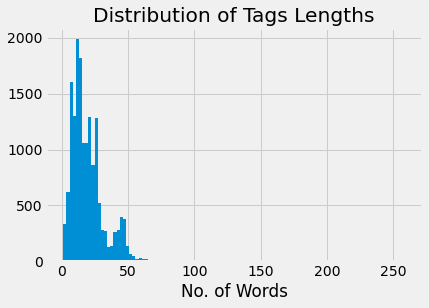

In [12]:
lengths = [len(t.split(' ')) for t in df['Tags']]
plt.hist(lengths, bins = len(set(lengths))) #bins set to same length of ordered tweet lengths
plt.style.use('fivethirtyeight')
plt.title('Distribution of Tags Lengths')
plt.xlabel('No. of Words')